In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
m = 200
x, y = datasets.make_classification(n_samples=m,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_repeated=0,
                                    n_classes=2,
                                    n_clusters_per_class=1,
                                    random_state=100)
y = y.reshape(-1, 1)
print('x.shape: ', x.shape)
print('y.shape: ', y.shape)

x.shape:  (200, 2)
y.shape:  (200, 1)


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print('x_train.shape: ', x_train.shape, 'y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape, 'y_test.shape: ', y_test.shape)

x_train.shape:  (150, 2) y_train.shape:  (150, 1)
x_test.shape:  (50, 2) y_test.shape:  (50, 1)


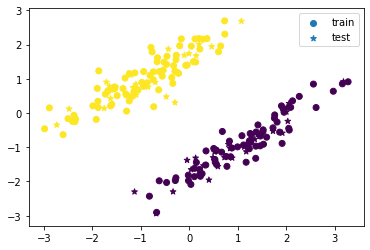

In [5]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train.reshape(-1), marker='o', label='train');
plt.scatter(x_test[:,0], x_test[:,1], c=y_test.reshape(-1), marker='*', label='test');
plt.legend();
plt.show()

### Hyper-paramters

In [6]:
n_inputs = x_train.shape[1]
m = x_train.shape[0]
n_outputs = 1
lr = 0.01
epochs = 500

### Defining Variables

In [7]:
w = tf.Variable(tf.zeros(shape=(2, 1), dtype=tf.float64), dtype=tf.float64)
b = tf.Variable(0, dtype=tf.float64)
print("w.shape: ",w.shape)
print("b.shape: ",b.shape)

w.shape:  (2, 1)
b.shape:  ()


In [8]:
optimizer = tf.optimizers.Adam(learning_rate=lr)

In [9]:
def model(x):
    z = tf.matmul(x, w) + b 
    y_pred = tf.sigmoid(z)
    return y_pred

In [10]:
def loss(y_true, y_pred):
    l = -(y_true * tf.math.log(y_pred) + (1- y_true) * tf.math.log(1-y_pred))
    return tf.reduce_mean(l)

In [11]:
def accuracy(y_pred, y_true):
    y_pred_r = tf.round(y_pred)
    compare = tf.equal(y_pred_r, y_true)
    acc = tf.math.count_nonzero(compare)/ tf.cast(tf.size(y_pred), dtype=tf.int64)
    return acc * 100

In [14]:
type(y_trainin)

numpy.ndarray

In [32]:
def gradient_descent_dynamic(x_train, y_train):
    with tf.GradientTape() as tape:
        y_pred = model(x_train)
        loss_v = loss(y_train, y_pred)
    grads = tape.gradient(loss_v, [w, b])
    optimizer.apply_gradients(zip(grads,[w, b]))
#     return y_pred, loss_v
%timeit gradient_descent_dynamic(x_train, y_train)

4.94 ms ± 715 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
y_train = tf.convert_to_tensor(y_train, dtype=tf.float64 )

In [33]:
@tf.function()
def gradient_descent_static(x_train, y_train):
    with tf.GradientTape() as tape:
        y_pred = model(x_train)
        loss_v = loss(y_train, y_pred)
    grads = tape.gradient(loss_v, [w, b])
    optimizer.apply_gradients(zip(grads,[w, b]))
#     return y_pred, loss_v
%timeit gradient_descent_static(x_train, y_train)

478 µs ± 98.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
(4.98 * 1e-3)/(478*1e-6)

10.418410041841007

In [97]:
for epoch in range(epochs):
    y_pred, loss_v = gradient_descent(x_train, y_train)
    acc = accuracy(y_pred, y_train)
    print('epoch: ', epoch, 'loss: ', loss_v.numpy(), 'acc: ', acc.numpy())

epoch:  0 loss:  0.6931471805599447 acc:  49.333333333333336
epoch:  1 loss:  0.6833972919606789 acc:  100.0
epoch:  2 loss:  0.6737737616336436 acc:  100.0
epoch:  3 loss:  0.6642753398027079 acc:  100.0
epoch:  4 loss:  0.6548955387160801 acc:  100.0
epoch:  5 loss:  0.6456241807035262 acc:  100.0
epoch:  6 loss:  0.6364543893838898 acc:  100.0
epoch:  7 loss:  0.6273860228888628 acc:  100.0
epoch:  8 loss:  0.6184229291918218 acc:  100.0
epoch:  9 loss:  0.6095697676562485 acc:  100.0
epoch:  10 loss:  0.600830393287428 acc:  100.0
epoch:  11 loss:  0.5922071896609242 acc:  100.0
epoch:  12 loss:  0.5837008853614833 acc:  100.0
epoch:  13 loss:  0.5753108236651295 acc:  100.0
epoch:  14 loss:  0.5670356978454324 acc:  100.0
epoch:  15 loss:  0.558874449394339 acc:  100.0
epoch:  16 loss:  0.5508268321718867 acc:  100.0
epoch:  17 loss:  0.5428934224733881 acc:  100.0
epoch:  18 loss:  0.5350752505443587 acc:  100.0
epoch:  19 loss:  0.527373336251876 acc:  100.0
epoch:  20 loss:  0.

epoch:  168 loss:  0.11031378341627587 acc:  100.0
epoch:  169 loss:  0.10954905540558796 acc:  100.0
epoch:  170 loss:  0.10879298789881037 acc:  100.0
epoch:  171 loss:  0.10804544746454288 acc:  100.0
epoch:  172 loss:  0.10730630322275042 acc:  100.0
epoch:  173 loss:  0.1065754267876086 acc:  100.0
epoch:  174 loss:  0.1058526922117871 acc:  100.0
epoch:  175 loss:  0.10513797593214269 acc:  100.0
epoch:  176 loss:  0.10443115671678696 acc:  100.0
epoch:  177 loss:  0.1037321156134853 acc:  100.0
epoch:  178 loss:  0.10304073589934352 acc:  100.0
epoch:  179 loss:  0.10235690303173706 acc:  100.0
epoch:  180 loss:  0.10168050460044306 acc:  100.0
epoch:  181 loss:  0.10101143028094288 acc:  100.0
epoch:  182 loss:  0.10034957178886544 acc:  100.0
epoch:  183 loss:  0.0996948228355479 acc:  100.0
epoch:  184 loss:  0.09904707908468864 acc:  100.0
epoch:  185 loss:  0.09840623811006824 acc:  100.0
epoch:  186 loss:  0.09777219935431074 acc:  100.0
epoch:  187 loss:  0.09714486408865

epoch:  334 loss:  0.046609276665529116 acc:  100.0
epoch:  335 loss:  0.046425623035962656 acc:  100.0
epoch:  336 loss:  0.04624317324136665 acc:  100.0
epoch:  337 loss:  0.04606191627225286 acc:  100.0
epoch:  338 loss:  0.045881841247570124 acc:  100.0
epoch:  339 loss:  0.04570293741289064 acc:  100.0
epoch:  340 loss:  0.045525194138626345 acc:  100.0
epoch:  341 loss:  0.04534860091827472 acc:  100.0
epoch:  342 loss:  0.045173147366693166 acc:  100.0
epoch:  343 loss:  0.04499882321840199 acc:  100.0
epoch:  344 loss:  0.04482561832591497 acc:  100.0
epoch:  345 loss:  0.04465352265809713 acc:  100.0
epoch:  346 loss:  0.04448252629854929 acc:  100.0
epoch:  347 loss:  0.0443126194440189 acc:  100.0
epoch:  348 loss:  0.04414379240283659 acc:  100.0
epoch:  349 loss:  0.04397603559337788 acc:  100.0
epoch:  350 loss:  0.043809339542549924 acc:  100.0
epoch:  351 loss:  0.04364369488430236 acc:  100.0
epoch:  352 loss:  0.04347909235816222 acc:  100.0
epoch:  353 loss:  0.04331

epoch:  494 loss:  0.027498934409250046 acc:  100.0
epoch:  495 loss:  0.027422644522758947 acc:  100.0
epoch:  496 loss:  0.02734670600951463 acc:  100.0
epoch:  497 loss:  0.027271116596778208 acc:  100.0
epoch:  498 loss:  0.027195874030677344 acc:  100.0
epoch:  499 loss:  0.02712097607601565 acc:  100.0


In [98]:
w1, w2 = w.numpy()

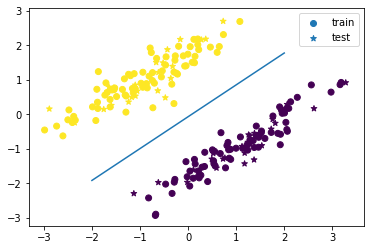

In [99]:
x1 = np.linspace(-2,2,500)
x2 = -w1/w2*x1 - b/w2
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train.reshape(-1), marker='o', label='train');
plt.scatter(x_test[:,0], x_test[:,1], c=y_test.reshape(-1), marker='*', label='test');
plt.legend();
plt.plot(x1, x2);

*:)*